<a href="https://colab.research.google.com/github/KAlikhanov/Project_2/blob/main/Multivariate_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Importing necessary libaries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Importing the data.
filename = '/content/drive/MyDrive/Colab Notebooks/Project 2/collegePlace.csv'
df = pd.read_csv(filename)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## Data Cleaning

In [82]:
# Creating a copy of the data.
ml_df = df.copy()

In [83]:
# Looking at the dtypes for the columns.
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [84]:
# Checking duplicates:
# For whatever reason pandas is saying there are a lot of duplicate rows when
# there are not, I manually checked some of these and they are not duplicates
# so I am unsure what is happening here, maybe has something to do with the csv.
# Because of this I will be ignoring duplicate values for now.
ml_df.duplicated().sum()

1829

In [85]:
# Manually seeing if the duplicate rows are indeed duplicates, as we can see
# they are not.
ml_df.loc[ml_df.duplicated(),:].sample(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
783,22,Male,Mechanical,0,8,1,0,1
2452,22,Male,Mechanical,1,6,0,0,0
337,21,Male,Information Technology,1,6,0,0,0
349,22,Female,Computer Science,1,8,1,0,1
2516,21,Male,Electronics And Communication,1,6,1,1,0
843,22,Male,Electrical,0,7,1,0,0
1568,22,Male,Computer Science,0,6,0,1,0
1735,24,Male,Information Technology,0,6,0,0,1
1209,21,Male,Information Technology,0,9,0,0,1
1466,22,Male,Information Technology,2,8,0,0,1


In [86]:
# Checking for missing values.
ml_df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [87]:
# Checking for categorical inconsistencies and numerical impossibilities as well
# as outliers.

# The age column shows 5 people aged 28-30 these can be considered outliers but
# I am not going to do anything about them as the values are clearly possible.

# No categorical inconsistencies or numerical impossibilities are shown.
cols = ['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 
        'HistoryOfBacklogs', 'PlacedOrNot']
for n in range(len(cols)):
  print(ml_df[cols[n]].value_counts())
  print('-------------------------------------')

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64
-------------------------------------
Male      2475
Female     491
Name: Gender, dtype: int64
-------------------------------------
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64
-------------------------------------
0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64
-------------------------------------
7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64
-------------------------------------
0    2168
1     798
Name: Hostel, dtype: int64
-------------------------------------
0    2396
1     570
Name: HistoryOfBacklogs, dtype: int64
-------------------------------------
1    1639
0    1327
Name: PlacedOrNo

The data appears to already be clean, so no further cleaning steps are necessary. I will try to fix the .duplicated().sum() issue, if I come up with a solution I will update this code.

## Univariate Visualizations

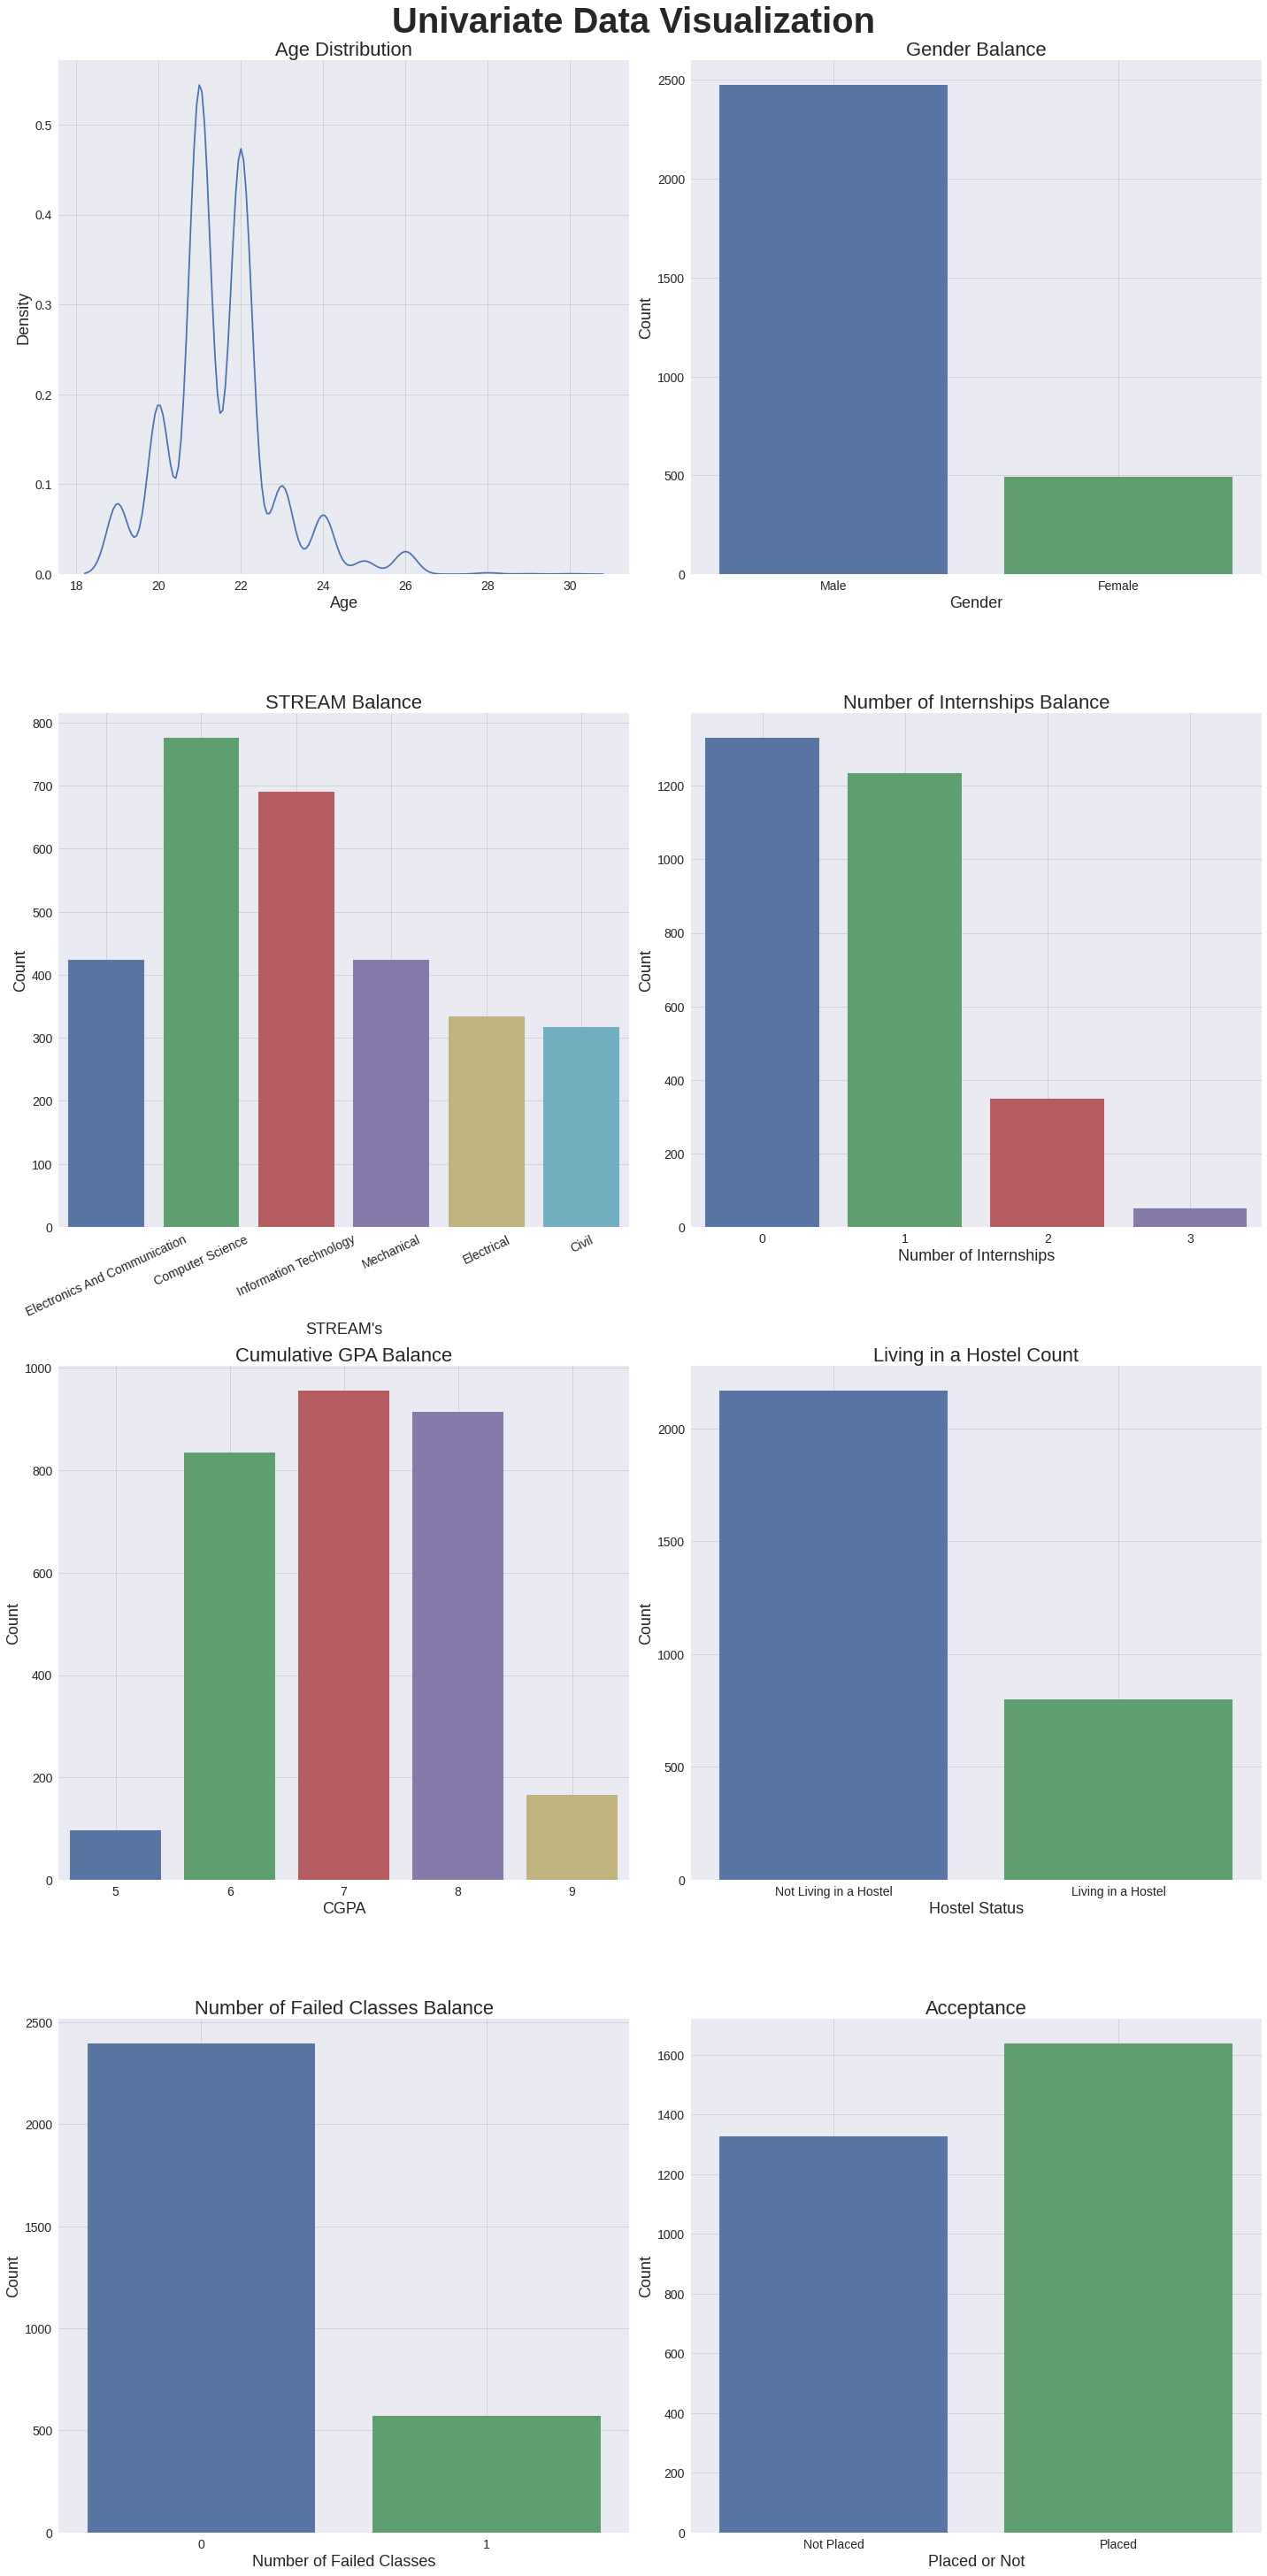

In [88]:
# Creating the univariate data visualizations.

# Creating the subplots.
plt.style.use('seaborn')
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,40))
ax = ax.flatten()

# This is a kdeplot of the different ages.
sns.kdeplot(data = ml_df, x = 'Age', ax = ax[0]);
ax[0].set_title('Age Distribution', fontsize = 22);
ax[0].set_xlabel('Age', fontsize=18);
ax[0].set_ylabel('Density', fontsize=18);
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].set_ylim(bottom=0)

# This is a countplot of the gender distribution.
sns.countplot(data = ml_df, x = 'Gender', ax = ax[1]);
ax[1].set_title('Gender Balance', fontsize = 22);
ax[1].set_xlabel('Gender', fontsize=18);
ax[1].set_ylabel('Count', fontsize=18);
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_ylim(bottom=0)

# This is a countplot of the STREAM distribution. STREAM stands for
# Science, Technology, Religion, Engineering, Arts and Mathematics.
sns.countplot(data = ml_df, x = 'Stream', ax = ax[2]);
ax[2].set_title('STREAM Balance', fontsize = 22);
ax[2].set_xlabel("STREAM's", fontsize=18);
ax[2].set_ylabel('Count', fontsize=18);
ax[2].tick_params(axis='x', labelsize=14, labelrotation = 25, labelleft = True)
ax[2].tick_params(axis='y', labelsize=14)
ax[2].set_ylim(bottom=0)

# This is a countplot of the number of internships taken by students.
sns.countplot(data = ml_df, x = 'Internships', ax = ax[3]);
ax[3].set_title('Number of Internships Balance', fontsize = 22);
ax[3].set_xlabel('Number of Internships', fontsize=18);
ax[3].set_ylabel('Count', fontsize=18);
ax[3].tick_params(axis='x', labelsize=14)
ax[3].tick_params(axis='y', labelsize=14)
ax[3].set_ylim(bottom=0)

# This is a countplot of the cumulative gpa.
sns.countplot(data = ml_df, x = 'CGPA', ax = ax[4]);
ax[4].set_title('Cumulative GPA Balance', fontsize = 22);
ax[4].set_xlabel('CGPA', fontsize=18);
ax[4].set_ylabel('Count', fontsize=18);
ax[4].tick_params(axis='x', labelsize=14)
ax[4].tick_params(axis='y', labelsize=14)
ax[4].set_ylim(bottom=0)

# This is a countplot on whether or not the student is living in a hostel.
hostel = ['Not Living in a Hostel', 'Living in a Hostel']
sns.countplot(data = ml_df, x = 'Hostel', ax = ax[5]);
ax[5].set_title('Living in a Hostel Count', fontsize = 22);
ax[5].set_xlabel('Hostel Status', fontsize=18);
ax[5].set_ylabel('Count', fontsize=18);
ax[5].tick_params(axis='x', labelsize=14)
ax[5].tick_params(axis='y', labelsize=14)
ax[5].set_xticklabels(hostel)
ax[5].set_ylim(bottom=0)

# This is a countplot for the number of previously failed classes.
sns.countplot(data = ml_df, x = 'HistoryOfBacklogs', ax = ax[6]);
ax[6].set_title('Number of Failed Classes Balance', fontsize = 22);
ax[6].set_xlabel('Number of Failed Classes', fontsize=18);
ax[6].set_ylabel('Count', fontsize=18);
ax[6].tick_params(axis='x', labelsize=14)
ax[6].tick_params(axis='y', labelsize=14)
ax[6].set_ylim(bottom=0)

# This is a countplot for the number of placed (or not) students.
acceptance = ['Not Placed', 'Placed']
sns.countplot(data = ml_df, x = 'PlacedOrNot', ax = ax[7]);
ax[7].set_title('Acceptance', fontsize = 22);
ax[7].set_xlabel('Placed or Not', fontsize=18);
ax[7].set_ylabel('Count', fontsize=18);
ax[7].tick_params(axis='x', labelsize=14)
ax[7].tick_params(axis='y', labelsize=14)
ax[7].set_xticklabels(acceptance)
ax[7].set_ylim(bottom=0)

[ax.grid(color='k',alpha=0.1) for ax in ax];
fig.suptitle('Univariate Data Visualization', fontsize = 40, fontweight ='bold', y = 1.01);
fig.tight_layout()


## Multivariate Visualizations

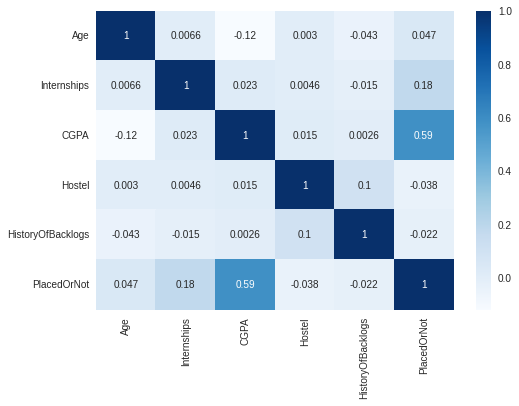

In [89]:
# Creating a heatmap to see correlations in the data.
# We can see that the only notable correlation is between CGPA and the 
# PlacedOrNot column. PlacedOrNot is our target so that may prove useful.
sns.heatmap(ml_df.corr(), annot=True, cmap = 'Blues');

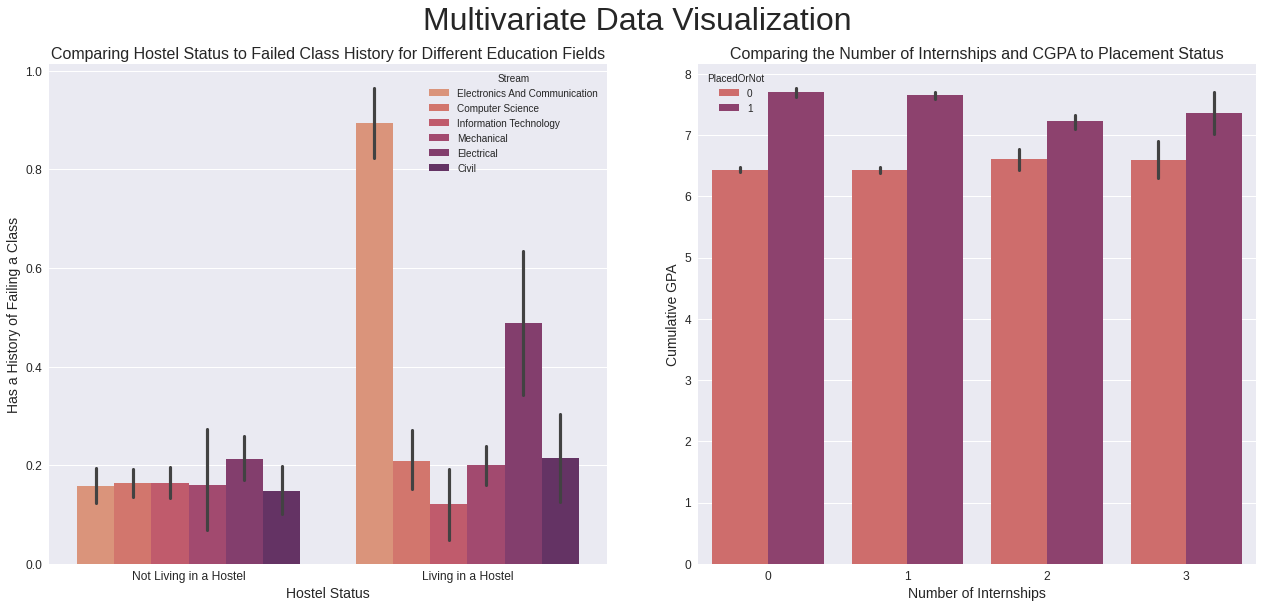

In [90]:
# Creating a plot for the multivariate visualizations
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,8));
fig.suptitle('Multivariate Data Visualization', fontsize = 32, y = 1.05);
axes = axes.flatten();

# First visualization
hostel = ['Not Living in a Hostel', 'Living in a Hostel']
sns.barplot(data=ml_df,
                x = 'Hostel',
                y = 'HistoryOfBacklogs',
                hue = 'Stream',
                palette = 'flare',
                ax = axes[0]);
axes[0].set_title('Comparing Hostel Status to Failed Class History for Different Education Fields', fontsize = 16);
axes[0].set_xlabel('Hostel Status', fontsize=14);
axes[0].set_ylabel('Has a History of Failing a Class', fontsize=14);
axes[0].set_xticklabels(hostel)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_ylim(bottom=0);

# Second visualization
sns.barplot(data=ml_df,
                x = 'Internships',
                y = 'CGPA',
                hue = 'PlacedOrNot',
                palette = 'flare',
                ax = axes[1]);
axes[1].set_ylim(bottom=0);
axes[1].set_title('Comparing the Number of Internships and CGPA to Placement Status', fontsize = 16);
axes[1].set_xlabel('Number of Internships', fontsize=14);
axes[1].set_ylabel('Cumulative GPA', fontsize=14);
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_ylim(bottom=0);

fig.tight_layout()

### Visualization Analysis

The first visualization compares the different education fields of students in relation to their hostel status and whether or not they have previously failed a class. 

The graph is split in two, the first half is a fairly regular barplot. Here we can see that the students that do not live in a hostel share a similar historical level of failing a class or not, this level is low. The only slight exception to this is the Electrical field which has a slightly higher history of failing a class when compared to the other fields. 

The second half paints a more vivid picture. For Electronics and Communication as well as Electrical students, those living in a hostel are much more likely to have a history of failing a class. With Electrical being at ~0.5, it is most surprising to see Electronics and Communication at ~0.9. Using this visualization we can infer that if a Electronics and Communication student is living in a hostel nine times out of ten they will have failed a class in the past. Something else to note is that Information Technology students living in a hostel have very low historical level of failing a class, the lowest on average. Information Technology being the only educational field where the historical level of failing a class is lower for those living in a hostel rather than not.

The second visualization is less jarring and compares the number of internships and the cumulative GPA to whether or not the student was placed.

In this visualization we can see that the average CGPA of those not placed does not change much with the number of internships. If I had to note a change it would be that the average CGPA of those not placed is slightly higher in students with 2-3 internships compared to those with 0-1 internships.

We can also see that the average CGPA of those that do get placed does change based on the number of internships. For 0 and 1 internships, the CGPA of students that got placed is relatively high and does not show a noticable difference between the two. However, starting from 2-3 internships, the average CGPA of those placed is noticably lower. This suggests that having completed some internships can help supplement a lower CGPA slightly.

Something else of note is that the average CGPA of those with 3 internships varies the most. This can be seen with the line at the top of the bars for 3 internships, when compared to the other bars the line is much bigger.